In [1]:
import numpy as np
import pandas as pd
import glob
import random

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

# Load dataset

In [3]:
data_path = "./camvid/"
training_path = "./camvid/701_StillsRaw_full/"
annotation_path = "./camvid/LabeledApproved_full/"

In [4]:
label_colors = pd.read_csv(data_path + "label_colors.txt", header=None, delim_whitespace=True)
label_colors

,0,1,2,3
0,64,128,64,Animal
1,192,0,128,Archway
2,0,128,192,Bicyclist
3,0,128,64,Bridge
4,128,0,0,Building
5,64,0,128,Car
6,64,0,192,CartLuggagePram
7,192,128,64,Child
8,192,192,128,Column_Pole
9,64,64,128,Fence


# Visualization

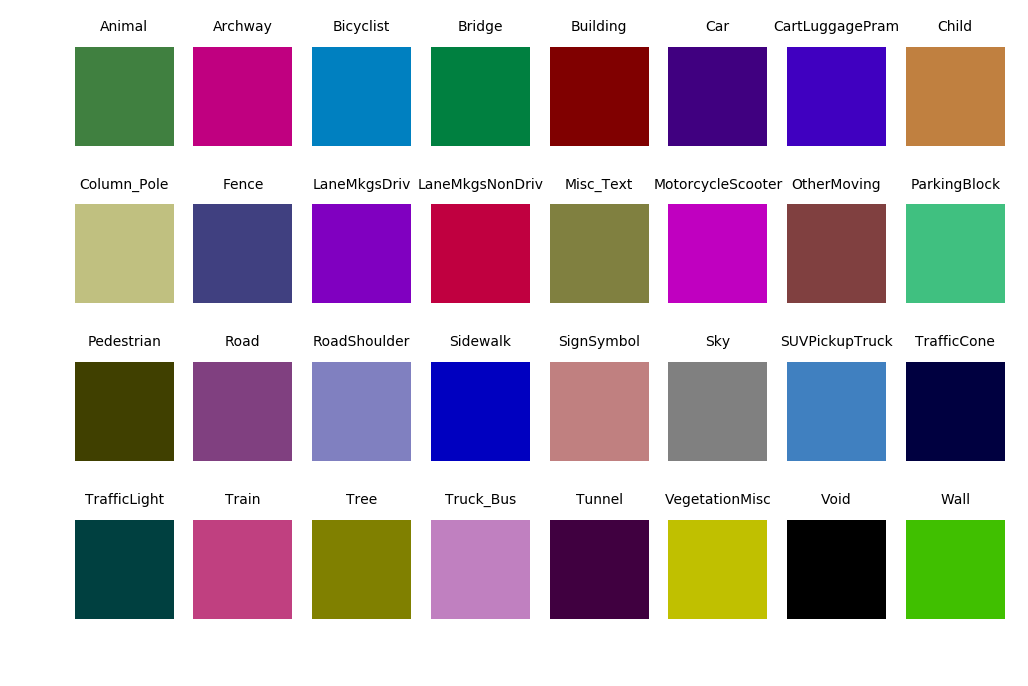

In [5]:
from matplotlib import gridspec

colorimgList = []
classList = []
for R,G,B,classname in zip(label_colors.iloc[:,0],label_colors.iloc[:,1],label_colors.iloc[:,2],label_colors.iloc[:,3]):
    R = np.full((32,32,1),R)
    G = np.full((32,32,1),G)
    B = np.full((32,32,1),B)
    colorimg = np.array(np.concatenate((R,G,B),axis=2), dtype=np.uint8)
    colorimgList.append(colorimg)
    classList.append(classname)

plt.figure(dpi=200)
gs = gridspec.GridSpec(4,8)
for i, g in enumerate(gs):
    ax = plt.subplot(g)
    plt.imshow(colorimgList[i]), plt.title(classList[i],fontsize=5), plt.axis('off')

In [6]:
train_list = sorted(glob.glob(training_path + "*.png"))
annot_list = sorted(glob.glob(annotation_path + "*.png"))

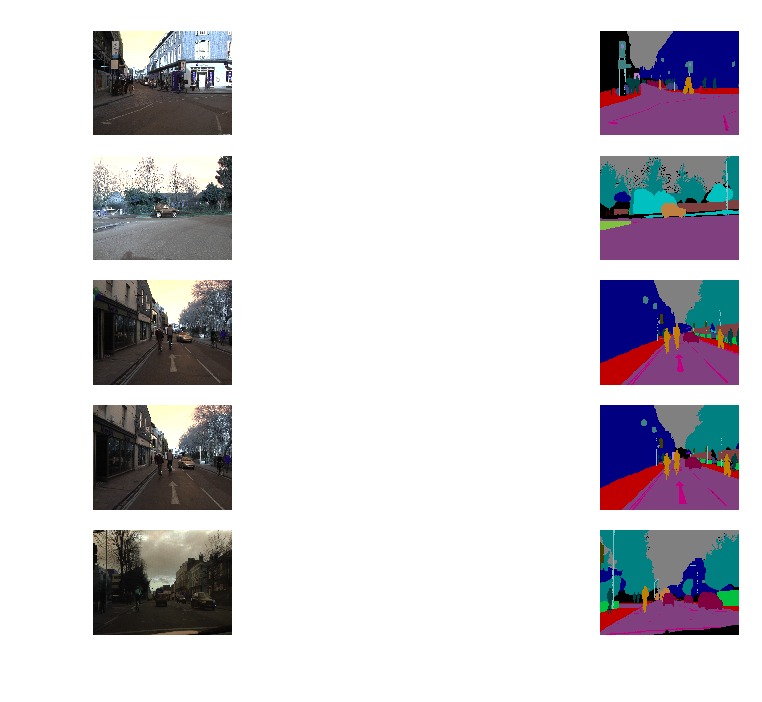

In [7]:
plt.figure(dpi=200)
for i in range(5):
    randidx = random.randint(0,len(train_list))
    plt.subplot(5,2,i*2+1), plt.imshow(cv2.imread(train_list[randidx])), plt.axis('off')
    plt.subplot(5,2,i*2+2), plt.imshow(cv2.imread(annot_list[randidx])), plt.axis('off')

# Create Dataset

In [8]:
from sklearn.model_selection import train_test_split
import pickle

In [9]:
data_path = "./camvid/"
training_path = "./camvid/701_StillsRaw_full/"
annotation_path = "./camvid/LabeledApproved_full/"

train_file = data_path + "train.p"
test_file = data_path + "test.p"

In [10]:
def make_train(train_path, annot_path):
    images = []
    masks = []
    
    train_list = sorted(glob.glob(train_path + "*.png"))
    annot_list = sorted(glob.glob(annot_path + "*.png"))
    
    num_total = len(train_list)
    
    for train_img, mask_img in zip(train_list, annot_list):
        images.append(cv2.imread(train_img))
        masks.append(cv2.imread(mask_img))
        
    images = np.array(images)
    masks = np.array(masks)
    
    return images, masks

In [11]:
def make_bin_label(annont_list, label_colors):
    for label in annot_list:
        label_img = cv2.imread(label)
        
        for i, R,G,B,classname in enumerate(zip(label_colors.iloc[:,0],label_colors.iloc[:,1],label_colors.iloc[:,2],label_colors.iloc[:,3])):
            R = np.full((720,960,1),R)
            G = np.full((720,960,1),G)
            B = np.full((720,960,1),B)
            colorimg = np.array(np.concatenate((R,G,B),axis=2), dtype=np.uint8)
            if colorimg & label_img:
                label_img = i+1
        
    return colorimg

In [12]:
c_img = make_bin_label(annotation_path, label_colors)

In [11]:
train_images, train_masks = make_train(training_path, annotation_path)

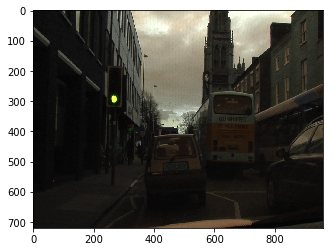

In [13]:
plt.imshow(train_images[0])

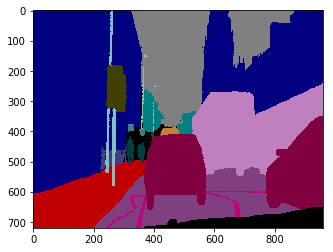

In [14]:
plt.imshow(train_masks[0])

In [15]:
X_train, X_test, y_train, y_test = train_test_split(train_images, train_masks, test_size=0.2, random_state=8)

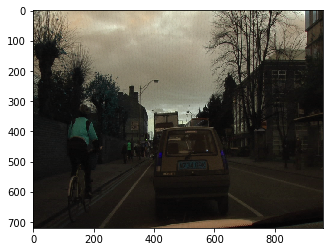

In [16]:
plt.imshow(X_train[0])

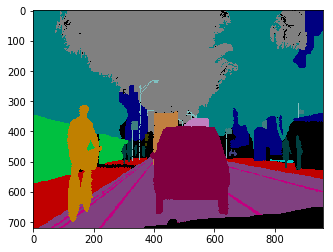

In [17]:
plt.imshow(y_train[0])

In [18]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((560, 720, 960, 3),
 (560, 720, 960, 3),
 (141, 720, 960, 3),
 (141, 720, 960, 3))

In [19]:
with open(train_file, mode='wb') as f:
    pickle.dump((X_train, y_train), f)
    
with open(test_file, mode="wb") as f:
    pickle.dump((X_test, y_test), f)